In [1]:
# !pip install torch
# pip install torch torchvision torchaudio -f https://download.pytorch.org/whl/cu{12.6}/torch_stable.html
#!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126
# import torch
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(device)
# tensor = torch.randn((3, 3))
# tensor = tensor.to('cuda')
#!nvcc --version

## .nc Dateien ##

In [2]:
import xarray
import os
import pandas as pd

def combine_files(path, file_name, file_format:str=".nc"):
    """Combine files of the same dataset with different timestamps. Converts them into a dataframe."""
    df = "a"
    df_new = "a"

    for file in os.listdir(path):
        if file.endswith(file_format) and file_name.lower() in file.lower(): 
            print(file)
            if file_format == ".nc":
                ds = xarray.open_dataset(path + "/" + file)

                if type(df) == type(str()):
                    df = ds.to_dataframe()
                else:
                    df_new = ds.to_dataframe()
            elif file_format == ".csv":
                if type(df) == type(str()):
                    df = pd.read_csv(path + "/" + file)
                else:
                    df_new = pd.read_csv(path + "/" + file)

            if type(df_new) != type(str()):
                df_total = pd.concat([df, df_new])

    return df_total

df_dwd_hornsea = combine_files("nc_files", "dwd_icon_eu_hornsea")
df_dwd_pes = combine_files("nc_files", "dwd_icon_eu_pes10")
df_dwd_demand = combine_files("nc_files", "dwd_icon_eu_demand")

ncep_gfs_hornsea = combine_files("nc_files", "ncep_gfs_hornsea")
ncep_gfs_pes = combine_files("nc_files", "ncep_gfs_pes10")
ncep_gfs_demand = combine_files("nc_files", "ncep_gfs_demand")

dwd_icon_eu_hornsea_1_20200920_20231027.nc
dwd_icon_eu_hornsea_1_20231027_20240108.nc
dwd_icon_eu_hornsea_1_20240108_20240129.nc
dwd_icon_eu_hornsea_1_20240129_20240519.nc
dwd_icon_eu_pes10_20200920_20231027.nc
dwd_icon_eu_pes10_20231027_20240108.nc
dwd_icon_eu_pes10_20240108_20240129.nc
dwd_icon_eu_pes10_20240129_20240519.nc
dwd_icon_eu_demand_20200920_20231027.nc
dwd_icon_eu_demand_20231027_20240108.nc
dwd_icon_eu_demand_20240108_20240129.nc
dwd_icon_eu_demand_20240129_20240519.nc
ncep_gfs_hornsea_1_20200920_20231027.nc
ncep_gfs_hornsea_1_20231027_20240108.nc
ncep_gfs_hornsea_1_20240108_20240129.nc
ncep_gfs_hornsea_1_20240129_20240519.nc
ncep_gfs_pes10_20200920_20231027.nc
ncep_gfs_pes10_20231027_20240108.nc
ncep_gfs_pes10_20240108_20240129.nc
ncep_gfs_pes10_20240129_20240519.nc
ncep_gfs_demand_20200920_20231027.nc
ncep_gfs_demand_20231027_20240108.nc
ncep_gfs_demand_20240108_20240129.nc
ncep_gfs_demand_20240129_20240519.nc


Visualisierung auf der Karte

<Axes: >

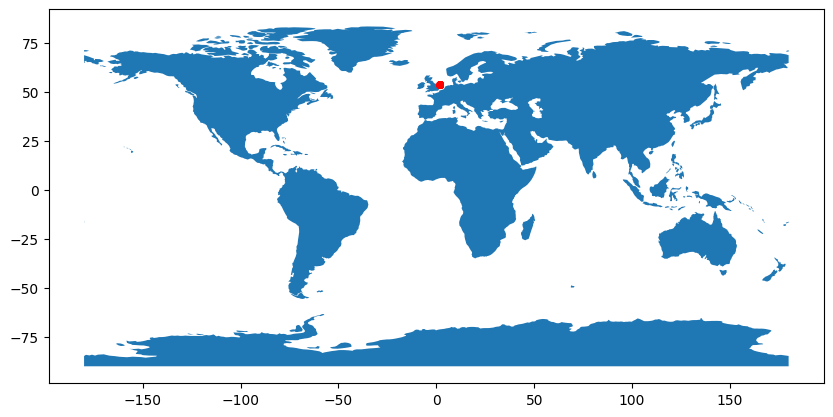

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets

df1_ = pd.concat([df_dwd_hornsea.reset_index()[["latitude", "longitude"]].drop_duplicates(), ncep_gfs_hornsea.reset_index()[["latitude", "longitude"]].drop_duplicates()])

geometry = [Point(xy) for xy in zip(df1_['longitude'], df1_['latitude'])]
gdf = GeoDataFrame(df1_, geometry=geometry)   

#this is a simple map that goes with geopandas
# deprecated: world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15)

<Axes: >

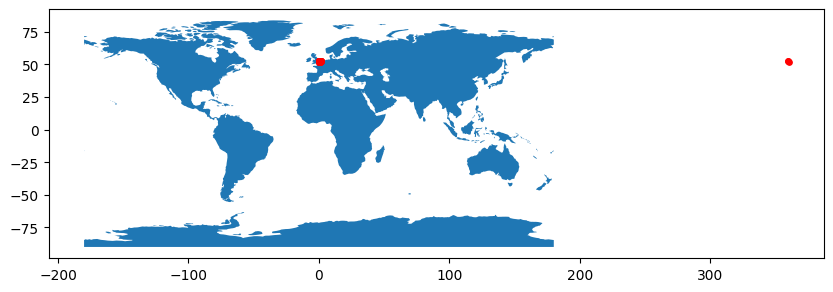

In [4]:
df2_ = pd.concat([df_dwd_pes.reset_index()[["latitude", "longitude"]].drop_duplicates(), ncep_gfs_pes.reset_index()[["latitude", "longitude"]].drop_duplicates()])

geometry = [Point(xy) for xy in zip(df2_['longitude'], df2_['latitude'])]
gdf = GeoDataFrame(df2_, geometry=geometry)   

#this is a simple map that goes with geopandas
# deprecated: world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15)

<Axes: >

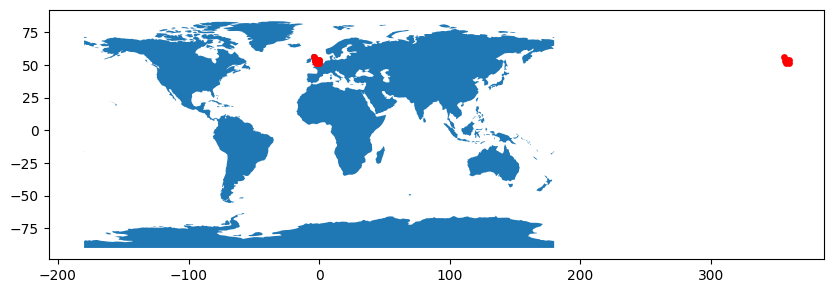

In [5]:
df3_ = pd.concat([df_dwd_demand.reset_index()[["latitude", "longitude"]].drop_duplicates(), ncep_gfs_demand.reset_index()[["latitude", "longitude"]].drop_duplicates()])

geometry = [Point(xy) for xy in zip(df3_['longitude'], df3_['latitude'])]
gdf = GeoDataFrame(df3_, geometry=geometry)   

#this is a simple map that goes with geopandas
# deprecated: world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15)

Gemeinsame Koordinaten für Hornsea

In [6]:
print("DWD")
print(len(df_dwd_hornsea.reset_index().latitude.unique()), "verschiedene Breitengradkoordinaten.")
print(len(df_dwd_hornsea.reset_index().longitude.unique()), "verschiedene Längengradkoordinaten.")
print("NCEP GFS")
print(len(ncep_gfs_hornsea.reset_index().latitude.unique()), "verschiedene Breitengradkoordinaten.")
print(len(ncep_gfs_hornsea.reset_index().longitude.unique()), "verschiedene Längengradkoordinaten.")
print("Schnittmenge")
print(len(set([*ncep_gfs_hornsea.reset_index().latitude.unique(), *df_dwd_hornsea.reset_index().latitude.unique()])), "verschiedene Breitengradkoordinaten")
print(len(set([*ncep_gfs_hornsea.reset_index().longitude.unique(), *df_dwd_hornsea.reset_index().longitude.unique()])), "verschiedene Längengradkoordinaten")

DWD
6 verschiedene Breitengradkoordinaten.
6 verschiedene Längengradkoordinaten.
NCEP GFS
3 verschiedene Breitengradkoordinaten.
3 verschiedene Längengradkoordinaten.
Schnittmenge
8 verschiedene Breitengradkoordinaten
9 verschiedene Längengradkoordinaten


Gemeinsame Koordinaten für Demand

In [7]:
print("DWD")
print(len(df_dwd_demand.reset_index().latitude.unique()), "verschiedene Breitengradkoordinaten.")
print(len(df_dwd_demand.reset_index().longitude.unique()), "verschiedene Längengradkoordinaten.")
print("NCEP GFS")
print(len(ncep_gfs_demand.reset_index().latitude.unique()), "verschiedene Breitengradkoordinaten.")
print(len(ncep_gfs_demand.reset_index().longitude.unique()), "verschiedene Längengradkoordinaten.")
print("Schnittmenge")
print(len(set([*ncep_gfs_demand.reset_index().latitude.unique(), *df_dwd_demand.reset_index().latitude.unique()])), "verschiedene Breitengradkoordinaten")
print(len(set([*ncep_gfs_demand.reset_index().longitude.unique(), *df_dwd_demand.reset_index().longitude.unique()])), "verschiedene Längengradkoordinaten")

DWD
7 verschiedene Breitengradkoordinaten.
7 verschiedene Längengradkoordinaten.
NCEP GFS
7 verschiedene Breitengradkoordinaten.
14 verschiedene Längengradkoordinaten.
Schnittmenge
7 verschiedene Breitengradkoordinaten
14 verschiedene Längengradkoordinaten


Gemeinsame Koordinaten für PES

In [8]:
print("DWD")
print(len(df_dwd_pes.reset_index().latitude.unique()), "verschiedene Breitengradkoordinaten.")
print(len(df_dwd_pes.reset_index().longitude.unique()), "verschiedene Längengradkoordinaten.")
print("NCEP GFS")
print(len(ncep_gfs_pes.reset_index().latitude.unique()), "verschiedene Breitengradkoordinaten.")
print(len(ncep_gfs_pes.reset_index().longitude.unique()), "verschiedene Längengradkoordinaten.")
print("Schnittmenge")
print(len(set([*ncep_gfs_pes.reset_index().latitude.unique(), *df_dwd_pes.reset_index().latitude.unique()])), "verschiedene Breitengradkoordinaten")
print(len(set([*ncep_gfs_pes.reset_index().longitude.unique(), *df_dwd_pes.reset_index().longitude.unique()])), "verschiedene Längengradkoordinaten")

DWD
19 verschiedene Breitengradkoordinaten.
20 verschiedene Längengradkoordinaten.
NCEP GFS
19 verschiedene Breitengradkoordinaten.
23 verschiedene Längengradkoordinaten.
Schnittmenge
19 verschiedene Breitengradkoordinaten
23 verschiedene Längengradkoordinaten


In [9]:
import numpy as np
import dask.dataframe as dd
import math

def preprocess_geo_data(df):
    
    df = clean_data(df)
    df = handle_missing_data(df)
    df = add_statistical_data(df)
    df = add_other_features(df)

    if "index" in df.columns:
        df.drop(["index"], axis = 1, inplace = True)

    return df

def clean_data(df):
    # reset the index (reference_time, valid_time, latitude, longitude)
    df.reset_index(inplace = True)
    # rename the columns properly
    df = df.rename(columns = {"level_0": "reference_time", "level_1": "valid_time"})
    if "index" in df.columns:
        df.drop(columns = ["index"], axis = 1, inplace = True)
    # convert the datetime information to the right format
    df["reference_time"] = pd.to_datetime(df.reference_time).dt.tz_localize("UTC")
    df["valid_time"] = df["reference_time"] + pd.to_timedelta(df["valid_time"], unit = "hour")
    # remove forecasts which extend beyond the day ahead, since they will be outdated the next day anyway
    print(df.shape)
    df = df[(df["valid_time"] - df["reference_time"]).div(pd.Timedelta("1h")) < 50]
    print(df.shape)
    # some data points have a miscalculation at their coordinates (e.g. ncep_gfs_demand). The actual coordinates can be identified by their value of the feature "point"
    df.loc[df.longitude > 90, "longitude"] -= 360
    df.loc[df.longitude < -90, "longitude"] += 360

    # there are anomalies of the solar down radiation being above 1000 in a short time period. The maximum threshold is to be believed to be about 1000 W/m^2
    # source: https://www.researchgate.net/post/Are_there_minimum_and_maximum_threshold_of_solar_irradiance
    if "SolarDownwardRadiation" in df.columns:
        df = df[df["SolarDownwardRadiation"] <= 1000]
        df.loc[df["SolarDownwardRadiation"] < 0, "SolarDownwardRadiation"] = 0
        # convert W/m^2 to kW/km^2
        # df["SolarDownwardRadiation"] = df["SolarDownwardRadiation"] * 1000

    if "RelativeHumidity" in df.columns:
        df.loc[df["RelativeHumidity"] > 100, "RelativeHumidity"] = 100
        df.loc[df["RelativeHumidity"] < 0, "RelativeHumidity"] = 0
        
    if "TotalPrecipitation" in df.columns:
        df.loc[df["TotalPrecipitation"] < 0, "TotalPrecipitation"] = 0

    df = df.groupby(["reference_time", "valid_time"]).mean().reset_index()
    df.drop(columns = ["latitude", "longitude"], axis = 1, inplace = True)

    if "point" in df.columns:
        df.drop(["point"], axis = 1, inplace = True)

    return df


def handle_missing_data(df):
    # Fill missing values by using the mean of other data points at a similiar time (same year, month and hour)
    mask = df.isna().any(axis=1)
    # Group by year, month, and hour, then calculate the mean
    grouped_means = df.groupby([df.valid_time.dt.year, df.valid_time.dt.month, df.valid_time.dt.hour]).transform('mean')
    # Fill missing values using the grouped means
    df[mask] = df[mask].fillna(grouped_means)
    
    return df


def add_statistical_data(df):

    if "point" in df.columns:
        columns_not_to_aggregate = ["reference_time", "latitude", "longitude", "point"]
    else:
        columns_not_to_aggregate = ["reference_time", "latitude", "longitude"]

    df_std = df.set_index("valid_time").resample("24h").std().sort_values("valid_time").drop(["reference_time"], axis = 1)
    df_mean = df.set_index("valid_time").resample("24h").mean().sort_values("valid_time").drop(["reference_time"], axis = 1)
    df_min = df.set_index("valid_time").resample("24h").min().sort_values("valid_time").drop(["reference_time"], axis = 1)
    df_max = df.set_index("valid_time").resample("24h").max().sort_values("valid_time").drop(["reference_time"], axis = 1)

    df_std.columns = [x + "_std" for x in df_std.columns]
    df_mean.columns = [x + "_mean" for x in df_mean.columns]
    df_min.columns = [x + "_min" for x in df_min.columns]
    df_max.columns = [x + "_max" for x in df_max.columns]

    df = df.sort_values("valid_time")

    for data in [df_std, df_mean, df_min, df_max]:
        df = pd.merge(df, data, on = "valid_time", how = "left")

    # Convert pandas dataframe to dask dataframe to enable a faster operation
    ddf = dd.from_pandas(df, npartitions=10)
    # fill the missing values, since the aggregations were computed on rows whose datetime values were at 12am.
    df = ddf.ffill().compute()

    return df


def add_other_features(df):

    bins = [0, 1, 5, 11, 19, 28, 38, 49, 61, 74, 88, 102, 117, float("inf")]
    labels = [x for x in range(0,13,1)]

    if "WindSpeed" in df.columns:
        # convert wind speed from m/s to km/h
        df["WindSpeed"] = df["WindSpeed"] * 3.6
        df["WindSpeed_range"] = df["WindSpeed_max"] - df["WindSpeed_min"]
        # add the beaufort scala for the wind speed
        # df["BeaufortScale"] = pd.cut(df["WindSpeed"], bins = bins, labels = labels, right = False)
        # df["BeaufortScale"] = pd.to_numeric(df["BeaufortScale"])

    if "WindSpeed:100" in df.columns:
        # convert wind speed from m/s to km/h
        df["WindSpeed:100"] = df["WindSpeed:100"] * 3.6
        df["WindSpeed:100_range"] = df["WindSpeed:100_max"] - df["WindSpeed:100_min"]
        # add the beaufort scala for the wind speed
        # df["BeaufortScale:100"] = pd.cut(df["WindSpeed:100"], bins = bins, labels = labels, right = False)
        # df["BeaufortScale:100"] = pd.to_numeric(df["BeaufortScale:100"])
        # add the altitude difference in wind speed
        df["WindSpeedAltitudeDiff"] = df["WindSpeed:100"] - df["WindSpeed"]

    if "WindDirection" in df.columns:
        df["WindDirection_sin"] = df["WindDirection"].apply(convert_wind_directions_to_sin)
        df["WindDirection_cos"] = df["WindDirection"].apply(convert_wind_directions_to_cos)
        df.drop(columns = ["WindDirection"], axis = 1, inplace = True)

    if "WindDirection:100" in df.columns:
        df["WindDirection:100_sin"] = df["WindDirection:100"].apply(convert_wind_directions_to_sin)
        df["WindDirection:100_cos"] = df["WindDirection:100"].apply(convert_wind_directions_to_cos)
        df.drop(columns = ["WindDirection:100"], axis = 1, inplace = True)

    if "SolarDownwardRadiation" in df.columns:
        df["SolarDownwardRadiation_range"] = df["SolarDownwardRadiation_max"] - df["SolarDownwardRadiation_min"]
        df["Interaction_SolarDownwardRadiation_Temperature"] = df["SolarDownwardRadiation"] * df["Temperature"]

    if "Temperature" in df.columns:
        df["Temperature_range"] = df["Temperature_max"] - df["Temperature_min"]

    return df


def convert_wind_directions_to_sin(data):
    data = np.deg2rad(data)
    return math.sin(data)

def convert_wind_directions_to_cos(data):
    data = np.deg2rad(data)
    return math.cos(data)


df_dwd_hornsea = preprocess_geo_data(df_dwd_hornsea)
ncep_gfs_hornsea = preprocess_geo_data(ncep_gfs_hornsea)
df_dwd_pes = preprocess_geo_data(df_dwd_pes)
ncep_gfs_pes = preprocess_geo_data(ncep_gfs_pes)
df_dwd_demand = preprocess_geo_data(df_dwd_demand)
ncep_gfs_demand = preprocess_geo_data(ncep_gfs_demand)

(16431984, 10)
(8834400, 10)
(9295902, 10)
(2223900, 10)
(9128880, 8)
(4908000, 8)
(20657560, 8)
(4942000, 8)
(3195108, 10)
(1717800, 10)
(7231609, 10)
(1730050, 10)


<Axes: xlabel='valid_time', ylabel='WindSpeed'>

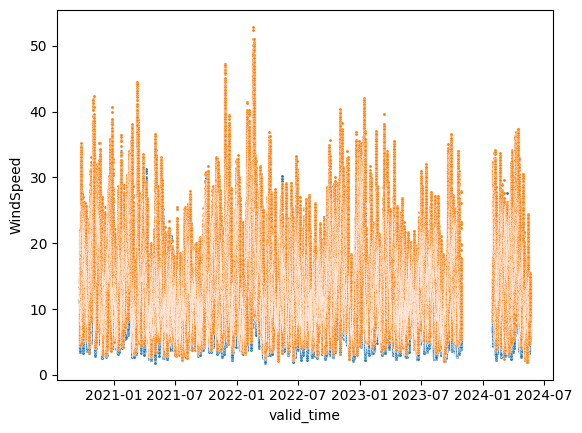

In [10]:
import seaborn as sns

sns.scatterplot(df_dwd_demand.sort_values(["reference_time", "valid_time"]), x = "valid_time", y = "WindSpeed", s = 5)
sns.scatterplot(ncep_gfs_demand.sort_values(["reference_time", "valid_time"]), x = "valid_time", y = "WindSpeed", s = 5)

In [11]:
hornsea = pd.concat([df_dwd_hornsea, ncep_gfs_hornsea]).groupby(["valid_time"]).mean().drop(["reference_time"], axis = 1)

In [12]:
demand = pd.concat([df_dwd_demand, ncep_gfs_demand]).groupby(["valid_time"]).mean().drop(["reference_time"], axis = 1)

In [13]:
pes = pd.concat([df_dwd_pes,ncep_gfs_pes]).groupby(["valid_time"]).mean().drop(["reference_time"], axis = 1)

In [14]:
pes[["CloudCover", "SolarDownwardRadiation", "Temperature"]].corr()

CloudCover  SolarDownwardRadiation  Temperature
CloudCover                1.000000               -0.130230     0.071187
SolarDownwardRadiation   -0.130230                1.000000     0.472149
Temperature               0.071187                0.472149     1.000000

## .JSON Dateien ##

In den JSON-Dateien befinden sich Informationen zu (un-)geplanten Ausfällen auf der Windkraftanlage HORNSEA.

In [15]:
import json

def extract_json_files(path):

    json_data = None

    for file in os.listdir(path):

        with open(path + "/" + file) as f:
            d = json.load(f)
            d = pd.json_normalize(d)

        if type(json_data) == type(None):
            json_data = d
        else:
            json_data = pd.concat([json_data, d])

    return json_data

json_data = extract_json_files("nc_files/REMIT")

In [16]:
json_data.head(5)

id dataset                                mrid  revisionNumber  \
0  17116   REMIT  11XDONG-PT-----2-NGET-RMT-00001689               1   
1  17326   REMIT  11XDONG-PT-----2-NGET-RMT-00001689               2   
2  17618   REMIT  11XDONG-PT-----2-NGET-RMT-00001695               1   
3  18969   REMIT  11XDONG-PT-----2-NGET-RMT-00001695               2   
4  19014   REMIT  11XDONG-PT-----2-NGET-RMT-00001701               1   

            publishTime           createdTime  \
0  2023-07-17T10:42:04Z  2023-07-17T10:35:00Z   
1  2023-07-18T14:12:03Z  2023-07-18T14:07:00Z   
2  2023-07-20T03:06:40Z  2023-07-19T07:50:00Z   
3  2023-07-24T07:00:04Z  2023-07-24T06:55:00Z   
4  2023-07-24T11:00:04Z  2023-07-24T10:55:00Z   

                               messageType     messageHeading  \
0  UnavailabilitiesOfElectricityFacilities  REMIT Information   
1  UnavailabilitiesOfElectricityFacilities  REMIT Information   
2  UnavailabilitiesOfElectricityFacilities  REMIT Information   
3  UnavailabilitiesOfElectricityFacilities  REMIT Information   
4  UnavailabilitiesOfElectricityFacilities  REMIT Information   

                   eventType unavailabilityType  ...       fuelType  \
0  Production unavailability            Planned  ...  Wind Offshore   
1  Production unavailability            Planned  ...  Wind Offshore   
2  Production unavailability            Planned  ...  Wind Offshore   
3  Production unavailability            Planned  ...  Wind Offshore   
4  Production unavailability            Planned  ...  Wind Offshore   

  normalCapacity availableCapacity unavailableCapacity eventStatus  \
0            400                 0                 400      Active   
1            400                 0                 400      Active   
2            400                 0                 400      Active   
3            400                 0                 400      Active   
4            400                 0                 400      Active   

         eventStartTime          eventEndTime           cause  \
0  2023-07-18T08:00:00Z  2023-07-18T14:00:00Z  Planned Outage   
1  2023-07-18T08:00:00Z  2023-07-18T16:00:00Z  Planned Outage   
2  2023-07-24T06:00:00Z  2023-07-24T14:00:00Z  Planned Outage   
3  2023-07-24T06:00:00Z  2023-07-24T08:00:00Z  Planned Outage   
4  2023-07-25T06:00:00Z  2023-07-25T14:00:00Z  Planned Outage   

                                       outageProfile  relatedInformation  
0  [{'startTime': '2023-07-18T08:00:00Z', 'endTim...                 NaN  
1  [{'startTime': '2023-07-18T08:00:00Z', 'endTim...                 NaN  
2  [{'startTime': '2023-07-24T06:00:00Z', 'endTim...                 NaN  
3  [{'startTime': '2023-07-24T06:00:00Z', 'endTim...                 NaN  
4  [{'startTime': '2023-07-25T06:00:00Z', 'endTim...                 NaN  

[5 rows x 28 columns]

In [17]:
df_outage = pd.DataFrame()

for id, x in json_data[["id", "outageProfile"]].iterrows():
    now_id = x["id"]
    for y in x["outageProfile"]:
        y["id"] = now_id
        df_outage = pd.concat([df_outage, pd.json_normalize(y)])

In [18]:
df_outage

startTime               endTime  capacity      id
0   2023-07-18T08:00:00Z  2023-07-18T14:00:00Z         0   17116
0   2023-07-18T08:00:00Z  2023-07-18T16:00:00Z         0   17326
0   2023-07-24T06:00:00Z  2023-07-24T14:00:00Z         0   17618
0   2023-07-24T06:00:00Z  2023-07-24T08:00:00Z         0   18969
0   2023-07-25T06:00:00Z  2023-07-25T14:00:00Z         0   19014
..                   ...                   ...       ...     ...
0   2024-02-23T18:00:00Z  2024-02-23T19:00:00Z         0  725348
0   2024-02-23T19:00:00Z  2024-04-30T17:00:00Z       150  725348
0   2024-01-29T02:10:00Z  2024-02-23T18:00:00Z       150  733271
0   2024-02-23T18:00:00Z  2024-02-23T19:00:00Z         0  733271
0   2024-02-23T19:00:00Z  2024-05-26T19:00:00Z       150  733271

[250 rows x 4 columns]

Die JSON-Datei enthält Informationen zu geplanten oder unerwarteten Ausfällen in der Windkraftanlage HORNSEA. Jede Zeile beschreibt einen Vorfall und dessen Beginn und Abschluss. 

Daher wird jede Zeile genutzt, um aus der Dauer zwischen Anfang und Beginn eines Ausfalls ein Zeitintervallindex zu erstellen mit einem Intervall von 30 Minuten. Anschließend wird dieser neue Datensatz mit den HORNSEA-Daten zusammengefügt.

In [19]:
def preprocess_outage_data(json_data):
    # dismissed outages are not relevant
    json_data = json_data[json_data.eventStatus != "Dismissed"]
    # drop those columns since they provide no value as features
    json_data.drop(columns = ["id", "outageProfile", "assetId", "affectedUnitEIC", "dataset", "eventStatus", "cause", "publishTime", "createdTime", "relatedInformation", "revisionNumber"], axis = 1, inplace = True)

    # drop string value columns with only one unique value
    for col in json_data.columns:
        if json_data[col].nunique() == 1 and json_data[col].dtypes == "O":
            try:
                json_data.drop(columns = col, inplace = True, axis = 1)
            except:
                continue

    # convert the datetime information to the right format
    for col in ["eventStartTime", "eventEndTime"]:
        json_data[col] = pd.to_datetime(json_data[col])


    outages_df = pd.DataFrame(columns = json_data.columns)

    # the outages contain start and end times for each outage. With this for loop we create for each 30min interval a new row and add it to the dataframe.
    # We basically include every time period inside of an outage in 30min periods.
    for row in json_data.iterrows():
        dates_30min_freq = pd.date_range(start = row[1]["eventStartTime"], end = row[1]["eventEndTime"], freq = "30min", inclusive = "both")
        json_data_with_date_ranges = pd.DataFrame(index = dates_30min_freq, columns = json_data.columns)
        json_data_with_date_ranges.iloc[:] = row[1]
        json_data_with_date_ranges = json_data_with_date_ranges.infer_objects(copy=False)
        outages_df = pd.concat([outages_df, json_data_with_date_ranges])


    # create new features for the outages
    outages_df["hoursSinceOutage"] = (outages_df.index - outages_df.eventStartTime).div(pd.Timedelta("1h"))
    outages_df["hoursUntilOutageEnd"] = (outages_df.eventEndTime - outages_df.index).div(pd.Timedelta("1h"))
    outages_df["outage"] = True
    outages_df["mrid"] = outages_df["mrid"].str.split("-").str[-1]

    outages_df.drop(columns = ["eventStartTime", "eventEndTime"], axis = 1, inplace = True)

    return outages_df

outages_df = preprocess_outage_data(json_data)


C:\Users\danie\AppData\Local\Temp\ipykernel_5856\3353469543.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  json_data.drop(columns = ["id", "outageProfile", "assetId", "affectedUnitEIC", "dataset", "eventStatus", "cause", "publishTime", "createdTime", "relatedInformation", "revisionNumber"], axis = 1, inplace = True)
C:\Users\danie\AppData\Local\Temp\ipykernel_5856\3353469543.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  json_data.drop(columns = col, inplace = True, axis = 1)
C:\Users\danie\AppData\Local\Temp\ipykernel_5856\3353469543.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [20]:
import plotly.express as px

px.scatter(outages_df[["affectedUnit", "unavailabilityType"]], color = "unavailabilityType", title = "Ausfallszeiträume der HORNSEA-Windkraftanlagen")

## .csv Dateien ##

In [21]:
import pandas as pd
import os

In [22]:
df_energy = combine_files("csv_files", "Energy_data", ".csv")

Energy_Data_20200920_20231027.csv
Energy_Data_20200920_20240118.csv
Energy_Data_20240119_20240519.csv


In [23]:
df_energy.head()

dtm    MIP  Solar_MW  Solar_capacity_mwp  \
0  2020-09-20T00:00:00Z  20.06       0.0         2108.489754   
1  2020-09-20T00:30:00Z  19.77       0.0         2108.489754   
2  2020-09-20T01:00:00Z  28.68       0.0         2108.489754   
3  2020-09-20T01:30:00Z  28.97       0.0         2108.489754   
4  2020-09-20T02:00:00Z  28.19       0.0         2108.489754   

   Solar_installedcapacity_mwp  Wind_MW  SS_Price  boa_MWh  DA_Price  
0                  2206.064655  996.284      2.50      0.0     32.17  
1                  2206.064655  957.576     15.00      0.0     32.17  
2                  2206.064655  941.044     47.95      0.0     32.00  
3                  2206.064655  964.366     29.13      0.0     32.00  
4                  2206.064655  918.432     28.95      0.0     31.99

In [24]:
from datetime import datetime
from math import sin, cos, pi


def cyclic_sin(n):
    theta = 2 * pi * n
    return sin(theta)

def cyclic_cos(n):
    theta = 2 * pi * n
    return cos(theta)

def get_cycles(d, sin_or_cos:int, time_information:str):
    '''
    Get the cyclic properties of a datetime,
    represented as points on the unit circle.
    Arguments
    ---------
    d : datetime object
    Returns
    -------
    dictionary of sine and cosine tuples

    source: https://medium.com/@dan.allison/how-to-encode-the-cyclic-properties-of-time-with-python-6f4971d245c0
    '''
    month = d.month - 1
    day = d.day - 1

    days_in_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

    if sin_or_cos == 0:
        if time_information.lower() == "month":
            return cyclic_sin(month / 12)
        elif time_information.lower() == "day":
            return cyclic_sin(day / days_in_month[month])
        elif time_information.lower() == "dayofweek":
            return cyclic_sin(d.weekday() / 7)
        elif time_information.lower() == "hour":
            return cyclic_sin(d.hour / 60)
        elif time_information.lower() == "minute":
            return cyclic_sin(d.minute / 60)
        else:
            return
    elif sin_or_cos == 1:
        if time_information.lower() == "month":
            return cyclic_cos(month / 12)
        elif time_information.lower() == "day":
            return cyclic_cos(day / days_in_month[month])
        elif time_information.lower() == "dayofweek":
            return cyclic_cos(d.weekday() / 7)
        elif time_information.lower() == "hour":
            return cyclic_cos(d.hour / 24)
        elif time_information.lower() == "minute":
            return cyclic_cos(d.minute / 60)
        else:
            return

In [25]:
def preprocess_energy_data(df_energy):
    # convert the datetime information to the right format
    df_energy["dtm"] = pd.to_datetime(df_energy["dtm"])

    # Group by year, month, and hour, then calculate the mean
    grouped_means = df_energy.groupby([df_energy.dtm.dt.year, df_energy.dtm.dt.month, df_energy.dtm.dt.hour]).transform('mean')

    # Fill missing values in df_energy with the corresponding grouped means
    df_energy = df_energy.fillna(grouped_means)

    # convert MW to MWh (30min periods --> multiply by 0.5)
    for col in ["Solar_MW", "Wind_MW"]:
        df_energy[col] = 0.5 * df_energy[col]

    df_energy["Wind_MWh_credit"] = df_energy["Wind_MW"] - df_energy["boa_MWh"]
    df_energy.rename(columns = {"Solar_MW": "Solar_MWh_credit", "Wind_MW": "Wind_MWh"}, inplace = True)

    df_energy["unused_Solar_capacity_mwp"] = df_energy["Solar_installedcapacity_mwp"] = df_energy["Solar_capacity_mwp"]

    for col in ["month", "day", "dayofweek", "hour", "minute"]:
        time_col_sin = "sin_" + col
        time_col_cos = "cos_" + col

        df_energy[time_col_sin] = df_energy.dtm.apply(get_cycles, args = (0, col))
        df_energy[time_col_cos] = df_energy.dtm.apply(get_cycles, args = (1, col))

    return df_energy

df_energy = preprocess_energy_data(df_energy)


Kombination von csv- und JSON-Dateien

In [26]:
pd.set_option('future.no_silent_downcasting', True)

def merge_energy_with_outages(energy_data, outage_data):
    energy_with_outages = pd.merge_asof(left = energy_data, right = outage_data, left_on = "dtm", right_on = outage_data.sort_index().index, direction = "nearest", tolerance = pd.Timedelta("30m"))

    # the merge will result in NA values (since outages are not present all the time), thus they have to be filled with replacement values
    energy_with_outages[["mrid", "affectedUnit", "unavailabilityType"]] = energy_with_outages[["mrid", "affectedUnit", "unavailabilityType"]].fillna("None")
    energy_with_outages[["unavailableCapacity", "hoursSinceOutage", "hoursUntilOutageEnd"]] = energy_with_outages[["unavailableCapacity", "hoursSinceOutage", "hoursUntilOutageEnd"]].fillna(0)
    energy_with_outages[["normalCapacity", "availableCapacity"]] = energy_with_outages[["normalCapacity", "availableCapacity"]].fillna(400)
    energy_with_outages["outage"] = energy_with_outages["outage"].fillna(False).astype(int)

    return energy_with_outages

energy_with_outages = merge_energy_with_outages(df_energy, outages_df)

In [27]:
energy_with_outages.head()

dtm    MIP  Solar_MWh_credit  Solar_capacity_mwp  \
0 2020-09-20 00:00:00+00:00  20.06               0.0         2108.489754   
1 2020-09-20 00:30:00+00:00  19.77               0.0         2108.489754   
2 2020-09-20 01:00:00+00:00  28.68               0.0         2108.489754   
3 2020-09-20 01:30:00+00:00  28.97               0.0         2108.489754   
4 2020-09-20 02:00:00+00:00  28.19               0.0         2108.489754   

   Solar_installedcapacity_mwp  Wind_MWh  SS_Price  boa_MWh  DA_Price  \
0                  2108.489754   498.142      2.50      0.0     32.17   
1                  2108.489754   478.788     15.00      0.0     32.17   
2                  2108.489754   470.522     47.95      0.0     32.00   
3                  2108.489754   482.183     29.13      0.0     32.00   
4                  2108.489754   459.216     28.95      0.0     31.99   

   Wind_MWh_credit  ...  cos_minute  mrid  unavailabilityType  affectedUnit  \
0          498.142  ...         1.0  None                None          None   
1          478.788  ...        -1.0  None                None          None   
2          470.522  ...         1.0  None                None          None   
3          482.183  ...        -1.0  None                None          None   
4          459.216  ...         1.0  None                None          None   

   normalCapacity  availableCapacity  unavailableCapacity  hoursSinceOutage  \
0             400                400                    0               0.0   
1             400                400                    0               0.0   
2             400                400                    0               0.0   
3             400                400                    0               0.0   
4             400                400                    0               0.0   

   hoursUntilOutageEnd  outage  
0                  0.0       0  
1                  0.0       0  
2                  0.0       0  
3                  0.0       0  
4                  0.0       0  

[5 rows x 30 columns]

Kombination mit CDF-Dateien

In [28]:
merged_hornsea = pd.merge_asof(hornsea.sort_values("valid_time"), energy_with_outages, left_on = "valid_time", right_on = "dtm", direction = "nearest", tolerance = pd.Timedelta("15min"))
print(merged_hornsea.shape)
merged_hornsea = merged_hornsea.dropna(axis = 0)
merged_hornsea.set_index("dtm", inplace = True)

merged_hornsea.dropna(axis = 0, inplace = True)

(29932, 66)


In [29]:
merged_pes = pd.merge_asof(pes.sort_values("valid_time"), energy_with_outages, left_on = "valid_time", right_on = "dtm", direction = "nearest", tolerance = pd.Timedelta("15min"))
print(merged_pes.shape)
merged_pes = merged_pes.dropna(axis = 0)
merged_pes.set_index("dtm", inplace = True)

merged_pes.dropna(axis = 0, inplace = True)

(29932, 48)


In [30]:
merged_demand = pd.merge_asof(demand.sort_values("valid_time"), energy_with_outages, left_on = "valid_time", right_on = "dtm", direction = "nearest", tolerance = pd.Timedelta("15min"))
print(merged_demand.shape)
merged_demand = merged_demand.dropna(axis = 0)
merged_demand.set_index("dtm", inplace = True)

merged_demand.dropna(axis = 0, inplace = True)

(29932, 58)


In [31]:
for col in ['RelativeHumidity', 'Temperature', 'TotalPrecipitation',
       'WindDirection', 'WindSpeed', 'MIP',
       'SS_Price', 'boa_MWh', 'DA_Price', 'normalCapacity',
       'availableCapacity', 'unavailableCapacity',
       'CloudCover', 'SolarDownwardRadiation', 'Temperature',
       'MIP',
       'Solar_MWh_credit',
       'Wind_MWh', 'SS_Price', 'boa_MWh', 'DA_Price', 'Wind_MWh_credit']:
    
    new_col = col + "_diff"
    if col in merged_demand.columns:
      merged_demand[new_col] = merged_demand[col].diff()
      merged_demand.loc[0, new_col] = 0
    if col in merged_hornsea.columns:
      merged_hornsea[new_col] = merged_hornsea[col].diff()
      merged_hornsea.loc[0, new_col] = 0
    if col in merged_pes.columns:
      merged_pes[new_col] = merged_pes[col].diff()
      merged_pes.loc[0, new_col] = 0

merged_demand.fillna(0, inplace = True)
merged_demand = merged_demand[merged_demand.index != 0]
merged_hornsea.fillna(0, inplace = True)
merged_hornsea = merged_hornsea[merged_hornsea.index != 0]
merged_pes.fillna(0, inplace = True)
merged_pes = merged_pes[merged_pes.index != 0]


In [32]:
merged_hornsea.columns

Index(['RelativeHumidity', 'Temperature', 'WindSpeed', 'WindSpeed:100',
       'RelativeHumidity_std', 'Temperature_std', 'WindDirection_std',
       'WindDirection:100_std', 'WindSpeed_std', 'WindSpeed:100_std',
       'RelativeHumidity_mean', 'Temperature_mean', 'WindDirection_mean',
       'WindDirection:100_mean', 'WindSpeed_mean', 'WindSpeed:100_mean',
       'RelativeHumidity_min', 'Temperature_min', 'WindDirection_min',
       'WindDirection:100_min', 'WindSpeed_min', 'WindSpeed:100_min',
       'RelativeHumidity_max', 'Temperature_max', 'WindDirection_max',
       'WindDirection:100_max', 'WindSpeed_max', 'WindSpeed:100_max',
       'WindSpeed_range', 'WindSpeed:100_range', 'WindSpeedAltitudeDiff',
       'WindDirection_sin', 'WindDirection_cos', 'WindDirection:100_sin',
       'WindDirection:100_cos', 'Temperature_range', 'MIP', 'Solar_MWh_credit',
       'Solar_capacity_mwp', 'Solar_installedcapacity_mwp', 'Wind_MWh',
       'SS_Price', 'boa_MWh', 'DA_Price', 'Wind_MWh_credit

In [33]:
from sklearn.preprocessing import OneHotEncoder

columns_to_ohe = ["mrid", "unavailabilityType", "affectedUnit"]

ohe_hornsea = OneHotEncoder(sparse_output = False)

ohe_hornsea.fit_transform(merged_hornsea[columns_to_ohe])

ohe_hornsea.get_feature_names_out()

array(['mrid_00001689', 'mrid_00001691', 'mrid_00001693', 'mrid_00001695',
       'mrid_00001697', 'mrid_00001699', 'mrid_00001701', 'mrid_00001798',
       'mrid_00001800', 'mrid_00001802', 'mrid_00001804', 'mrid_00001806',
       'mrid_00001818', 'mrid_00001820', 'mrid_00001870', 'mrid_None',
       'unavailabilityType_None', 'unavailabilityType_Planned',
       'unavailabilityType_Unplanned', 'affectedUnit_HOWAO-1',
       'affectedUnit_HOWAO-2', 'affectedUnit_HOWAO-3',
       'affectedUnit_None'], dtype=object)

In [44]:
encoded = ohe_hornsea.fit_transform(merged_hornsea[columns_to_ohe])

merged_hornsea[ohe_hornsea.get_feature_names_out()] = encoded

merged_hornsea.drop(columns = columns_to_ohe, axis = 1, inplace = True)

In [45]:
merged_hornsea

RelativeHumidity  Temperature  WindSpeed  \
dtm                                                                   
2020-09-20 00:00:00+00:00         84.640213    15.433341  34.488773   
2020-09-20 01:00:00+00:00         84.805389    15.376245  34.704910   
2020-09-20 02:00:00+00:00         84.485832    15.380949  34.482151   
2020-09-20 03:00:00+00:00         84.077728    15.329873  34.192997   
2020-09-20 04:00:00+00:00         83.913574    15.320847  34.150311   
...                                     ...          ...        ...   
2024-05-19 19:00:00+00:00         87.780647    11.635825  21.807268   
2024-05-19 20:00:00+00:00         90.269699    11.342031  23.337528   
2024-05-19 21:00:00+00:00         91.599213    11.118525  23.896288   
2024-05-19 22:00:00+00:00         92.046112    11.060558  23.854248   
2024-05-19 23:00:00+00:00         92.094505    11.031017  23.622131   

                           WindSpeed:100  RelativeHumidity_std  \
dtm                                                              
2020-09-20 00:00:00+00:00      41.654869              1.472328   
2020-09-20 01:00:00+00:00      41.739052              1.472328   
2020-09-20 02:00:00+00:00      41.315880              1.472328   
2020-09-20 03:00:00+00:00      40.730904              1.472328   
2020-09-20 04:00:00+00:00      40.593979              1.472328   
...                                  ...                   ...   
2024-05-19 19:00:00+00:00      31.140009              3.368053   
2024-05-19 20:00:00+00:00      31.270626              3.368053   
2024-05-19 21:00:00+00:00      31.041058              3.368053   
2024-05-19 22:00:00+00:00      30.752705              3.368053   
2024-05-19 23:00:00+00:00      30.111996              3.368053   

                           Temperature_std  WindDirection_std  \
dtm                                                             
2020-09-20 00:00:00+00:00         0.245912           8.506954   
2020-09-20 01:00:00+00:00         0.245912           8.506954   
2020-09-20 02:00:00+00:00         0.245912           8.506954   
2020-09-20 03:00:00+00:00         0.245912           8.506954   
2020-09-20 04:00:00+00:00         0.245912           8.506954   
...                                    ...                ...   
2024-05-19 19:00:00+00:00         0.347685          37.810658   
2024-05-19 20:00:00+00:00         0.347685          37.810658   
2024-05-19 21:00:00+00:00         0.347685          37.810658   
2024-05-19 22:00:00+00:00         0.347685          37.810658   
2024-05-19 23:00:00+00:00         0.347685          37.810658   

                           WindDirection:100_std  WindSpeed_std  \
dtm                                                               
2020-09-20 00:00:00+00:00               8.597742       1.427144   
2020-09-20 01:00:00+00:00               8.597742       1.427144   
2020-09-20 02:00:00+00:00               8.597742       1.427144   
2020-09-20 03:00:00+00:00               8.597742       1.427144   
2020-09-20 04:00:00+00:00               8.597742       1.427144   
...                                          ...            ...   
2024-05-19 19:00:00+00:00               7.444391       0.808211   
2024-05-19 20:00:00+00:00               7.444391       0.808211   
2024-05-19 21:00:00+00:00               7.444391       0.808211   
2024-05-19 22:00:00+00:00               7.444391       0.808211   
2024-05-19 23:00:00+00:00               7.444391       0.808211   

                           WindSpeed:100_std  ...  mrid_00001820  \
dtm                                           ...                  
2020-09-20 00:00:00+00:00           1.768682  ...            0.0   
2020-09-20 01:00:00+00:00           1.768682  ...            0.0   
2020-09-20 02:00:00+00:00           1.768682  ...            0.0   
2020-09-20 03:00:00+00:00           1.768682  ...            0.0   
2020-09-20 04:00:00+00:00           1.768682  ...            0.0   
...                                      ...  ... 

In [63]:
columns_to_ohe = ["mrid", "unavailabilityType", "affectedUnit"]

ohe = OneHotEncoder(sparse_output = False)

ohe.fit_transform(merged_pes[["mrid", "unavailabilityType", "affectedUnit"]])

ohe.get_feature_names_out()


array(['mrid_00001689', 'mrid_00001691', 'mrid_00001693', 'mrid_00001695',
       'mrid_00001697', 'mrid_00001699', 'mrid_00001701', 'mrid_00001798',
       'mrid_00001800', 'mrid_00001802', 'mrid_00001804', 'mrid_00001806',
       'mrid_00001818', 'mrid_00001820', 'mrid_00001870', 'mrid_None',
       'unavailabilityType_None', 'unavailabilityType_Planned',
       'unavailabilityType_Unplanned', 'affectedUnit_HOWAO-1',
       'affectedUnit_HOWAO-2', 'affectedUnit_HOWAO-3',
       'affectedUnit_None'], dtype=object)

In [64]:
df_dwd_hornsea.shape

(245400, 38)

In [65]:
pes.isnull().sum()

CloudCover                                        0
SolarDownwardRadiation                            0
Temperature                                       0
CloudCover_std                                    0
SolarDownwardRadiation_std                        0
Temperature_std                                   0
CloudCover_mean                                   0
SolarDownwardRadiation_mean                       0
Temperature_mean                                  0
CloudCover_min                                    0
SolarDownwardRadiation_min                        0
Temperature_min                                   0
CloudCover_max                                    0
SolarDownwardRadiation_max                        0
Temperature_max                                   0
SolarDownwardRadiation_range                      0
Interaction_SolarDownwardRadiation_Temperature    0
Temperature_range                                 0
dtype: int64

In [66]:
merged_hornsea.shape

(29880, 78)

In [67]:
merged_pes.shape

(29880, 60)

In [68]:
merged_demand.shape

(29880, 71)

In [69]:
merged_pes.columns

Index(['CloudCover', 'SolarDownwardRadiation', 'Temperature', 'CloudCover_std',
       'SolarDownwardRadiation_std', 'Temperature_std', 'CloudCover_mean',
       'SolarDownwardRadiation_mean', 'Temperature_mean', 'CloudCover_min',
       'SolarDownwardRadiation_min', 'Temperature_min', 'CloudCover_max',
       'SolarDownwardRadiation_max', 'Temperature_max',
       'SolarDownwardRadiation_range',
       'Interaction_SolarDownwardRadiation_Temperature', 'Temperature_range',
       'MIP', 'Solar_MWh_credit', 'Solar_capacity_mwp',
       'Solar_installedcapacity_mwp', 'Wind_MWh', 'SS_Price', 'boa_MWh',
       'DA_Price', 'Wind_MWh_credit', 'unused_Solar_capacity_mwp', 'sin_month',
       'cos_month', 'sin_day', 'cos_day', 'sin_dayofweek', 'cos_dayofweek',
       'sin_hour', 'cos_hour', 'sin_minute', 'cos_minute', 'mrid',
       'unavailabilityType', 'affectedUnit', 'normalCapacity',
       'availableCapacity', 'unavailableCapacity', 'hoursSinceOutage',
       'hoursUntilOutageEnd', 'outag

In [70]:
merged_demand.columns

Index(['RelativeHumidity', 'Temperature', 'TotalPrecipitation', 'WindSpeed',
       'RelativeHumidity_std', 'Temperature_std', 'TotalPrecipitation_std',
       'WindDirection_std', 'WindSpeed_std', 'RelativeHumidity_mean',
       'Temperature_mean', 'TotalPrecipitation_mean', 'WindDirection_mean',
       'WindSpeed_mean', 'RelativeHumidity_min', 'Temperature_min',
       'TotalPrecipitation_min', 'WindDirection_min', 'WindSpeed_min',
       'RelativeHumidity_max', 'Temperature_max', 'TotalPrecipitation_max',
       'WindDirection_max', 'WindSpeed_max', 'WindSpeed_range',
       'WindDirection_sin', 'WindDirection_cos', 'Temperature_range', 'MIP',
       'Solar_MWh_credit', 'Solar_capacity_mwp', 'Solar_installedcapacity_mwp',
       'Wind_MWh', 'SS_Price', 'boa_MWh', 'DA_Price', 'Wind_MWh_credit',
       'unused_Solar_capacity_mwp', 'sin_month', 'cos_month', 'sin_day',
       'cos_day', 'sin_dayofweek', 'cos_dayofweek', 'sin_hour', 'cos_hour',
       'sin_minute', 'cos_minute', 'mrid', 

## Visualisierung ##

<Axes: xlabel='dtm', ylabel='WindSpeed'>

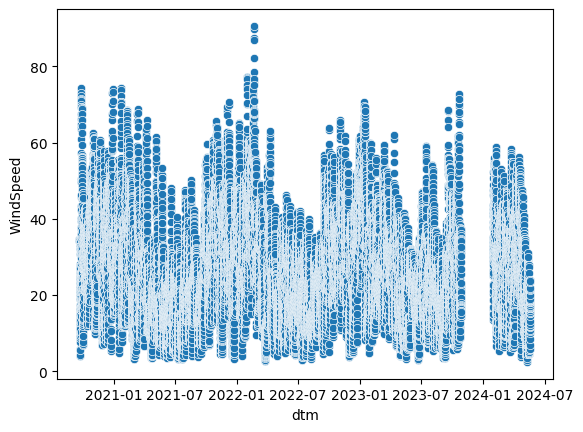

In [73]:
import seaborn as sns

sns.scatterplot(merged_hornsea, x = "dtm", y = "WindSpeed")

<Axes: xlabel='dtm', ylabel='SolarDownwardRadiation'>

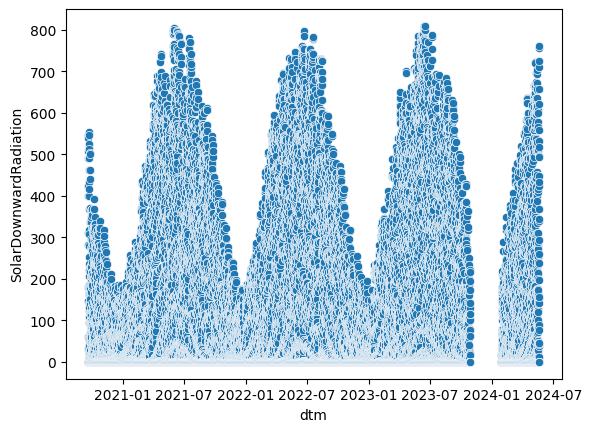

In [74]:
sns.scatterplot(merged_pes, x = "dtm", y = "SolarDownwardRadiation")

<Axes: xlabel='dtm', ylabel='Temperature'>

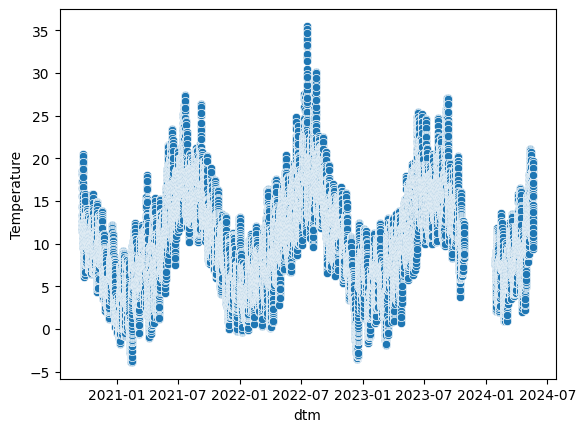

In [75]:
sns.scatterplot(merged_demand, x = "dtm", y = "Temperature")

<Axes: xlabel='WindSpeed', ylabel='Wind_MWh'>

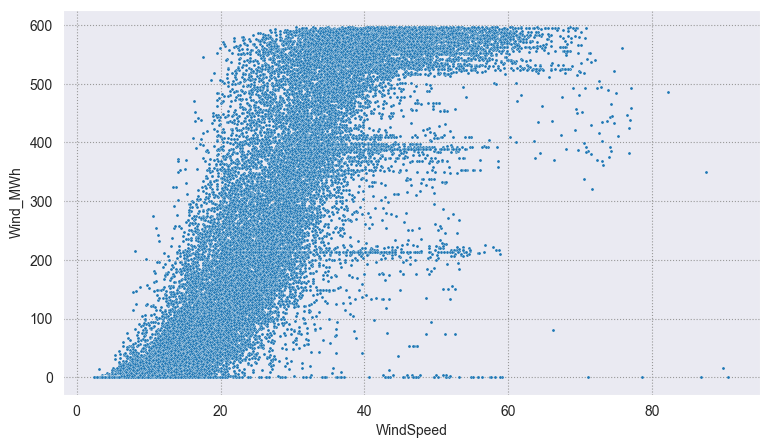

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,5))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.scatterplot(merged_hornsea, x = "WindSpeed", y = "Wind_MWh", s = 5)

<Axes: xlabel='WindSpeed:100', ylabel='Wind_MWh'>

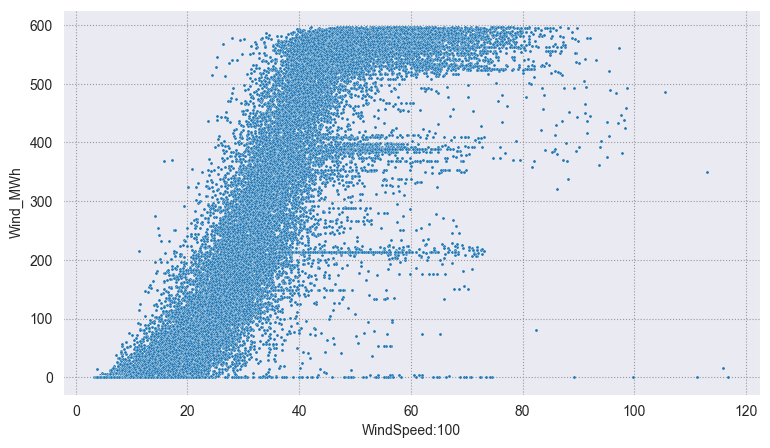

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,5))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.scatterplot(merged_hornsea, x = "WindSpeed:100", y = "Wind_MWh", s = 5)

In [78]:
merged_hornsea.columns

Index(['RelativeHumidity', 'Temperature', 'WindSpeed', 'WindSpeed:100',
       'RelativeHumidity_std', 'Temperature_std', 'WindDirection_std',
       'WindDirection:100_std', 'WindSpeed_std', 'WindSpeed:100_std',
       'RelativeHumidity_mean', 'Temperature_mean', 'WindDirection_mean',
       'WindDirection:100_mean', 'WindSpeed_mean', 'WindSpeed:100_mean',
       'RelativeHumidity_min', 'Temperature_min', 'WindDirection_min',
       'WindDirection:100_min', 'WindSpeed_min', 'WindSpeed:100_min',
       'RelativeHumidity_max', 'Temperature_max', 'WindDirection_max',
       'WindDirection:100_max', 'WindSpeed_max', 'WindSpeed:100_max',
       'WindSpeed_range', 'WindSpeed:100_range', 'WindSpeedAltitudeDiff',
       'WindDirection_sin', 'WindDirection_cos', 'WindDirection:100_sin',
       'WindDirection:100_cos', 'Temperature_range', 'MIP', 'Solar_MWh_credit',
       'Solar_capacity_mwp', 'Solar_installedcapacity_mwp', 'Wind_MWh',
       'SS_Price', 'boa_MWh', 'DA_Price', 'Wind_MWh_credit

<Axes: xlabel='SolarDownwardRadiation', ylabel='Solar_MWh_credit'>

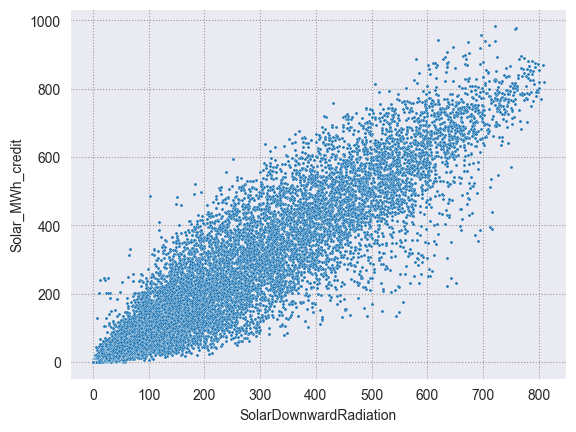

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(merged_pes, x = "SolarDownwardRadiation", y = "Solar_MWh_credit", s = 5)

In [96]:
import plotly.express as px

px.scatter(merged_hornsea[merged_hornsea["WindSpeed"] < 10], x = merged_hornsea[merged_hornsea["WindSpeed"] < 10].index, y = ["WindSpeed", "Wind_MWh_credit"])

In [82]:
merged_pes.columns

Index(['CloudCover', 'SolarDownwardRadiation', 'Temperature', 'CloudCover_std',
       'SolarDownwardRadiation_std', 'Temperature_std', 'CloudCover_mean',
       'SolarDownwardRadiation_mean', 'Temperature_mean', 'CloudCover_min',
       'SolarDownwardRadiation_min', 'Temperature_min', 'CloudCover_max',
       'SolarDownwardRadiation_max', 'Temperature_max',
       'SolarDownwardRadiation_range',
       'Interaction_SolarDownwardRadiation_Temperature', 'Temperature_range',
       'MIP', 'Solar_MWh_credit', 'Solar_capacity_mwp',
       'Solar_installedcapacity_mwp', 'Wind_MWh', 'SS_Price', 'boa_MWh',
       'DA_Price', 'Wind_MWh_credit', 'unused_Solar_capacity_mwp', 'sin_month',
       'cos_month', 'sin_day', 'cos_day', 'sin_dayofweek', 'cos_dayofweek',
       'sin_hour', 'cos_hour', 'sin_minute', 'cos_minute', 'mrid',
       'unavailabilityType', 'affectedUnit', 'normalCapacity',
       'availableCapacity', 'unavailableCapacity', 'hoursSinceOutage',
       'hoursUntilOutageEnd', 'outag

<Axes: xlabel='dtm', ylabel='DA_Price'>

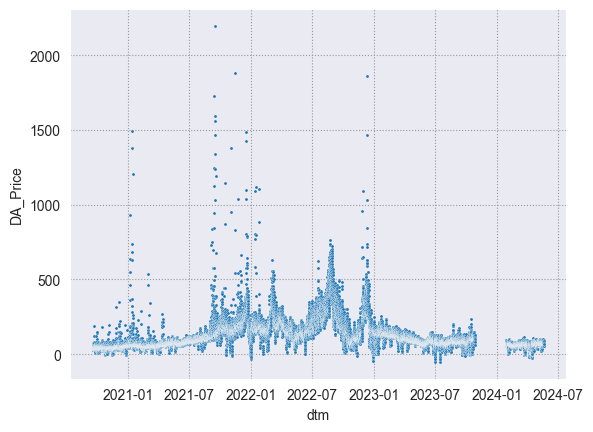

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(merged_hornsea, x = "dtm", y = "DA_Price", s = 5)

Features und Labels

Forecasting: Solar_MWh, Wind_MWh

Trading: Handelbarer Strom